In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Module Functions

In [8]:
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat
import os
from sklearn.feature_selection import VarianceThreshold

# Importando dados

In [5]:
dados = "/content/drive/My Drive/smiles/BACES/ligands_matrix.csv"

In [6]:
train_set = pd.read_csv(dados, index_col='name')
train_set

,0,1,2,3,4,5,6,7,8,9,...,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214
name,,,,,,,,,,,,,,,,,,,,,
BCRO,0,1,0,0,1,0,1,0,1,0,...,0,1,1,1,1,1,1,1,1,0
BUWX,0,1,0,0,1,0,1,0,1,0,...,0,1,1,1,1,1,1,1,1,0
GXUG,1,1,0,0,1,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
SZQK,1,1,1,0,0,1,0,0,1,0,...,1,1,1,0,1,1,1,1,1,0
SBXJ,1,1,1,1,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNWC,1,0,0,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,0
EPCH,1,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
ZNTG,1,0,0,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1


# MAIN

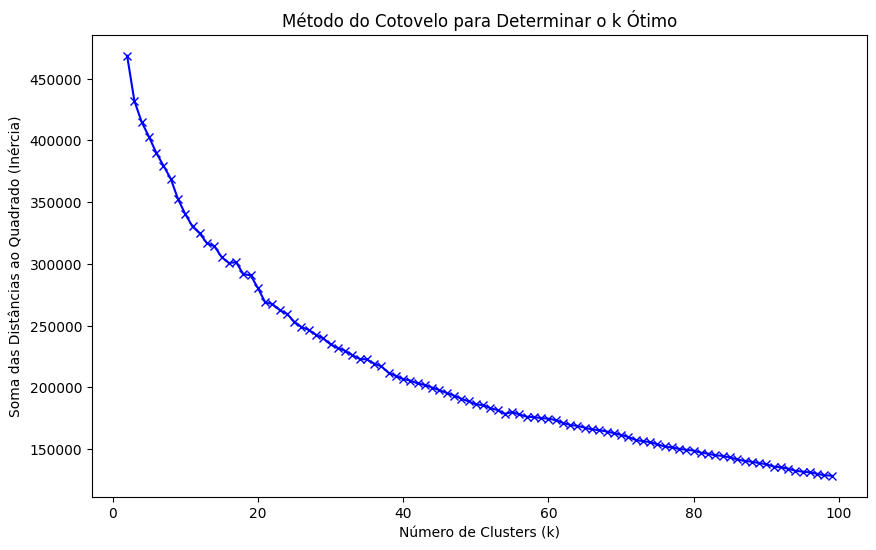

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(2, 100)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(train_set)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma das Distâncias ao Quadrado (Inércia)')
plt.title('Método do Cotovelo para Determinar o k Ótimo')
plt.show()


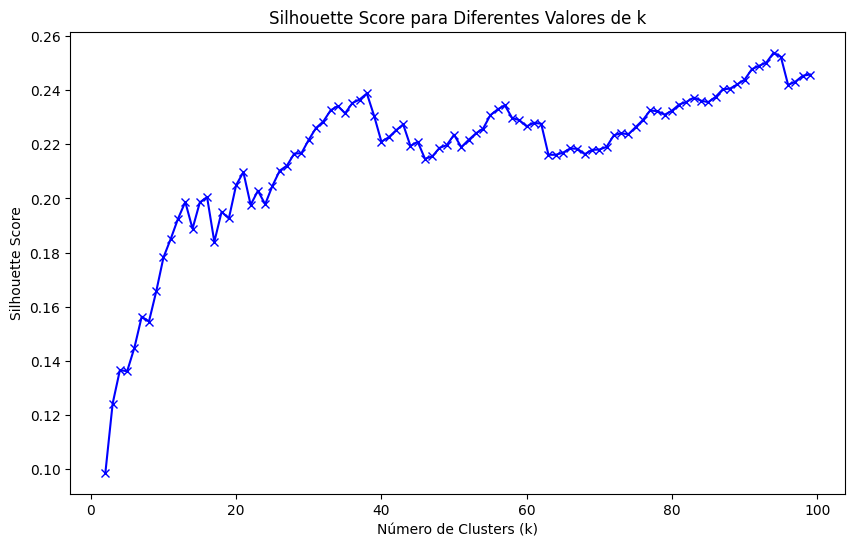

In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Silhouette_scores = []
K = range(2, 100)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(train_set)
    score = silhouette_score(train_set, labels)
    Silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K, Silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Valores de k')
plt.show()


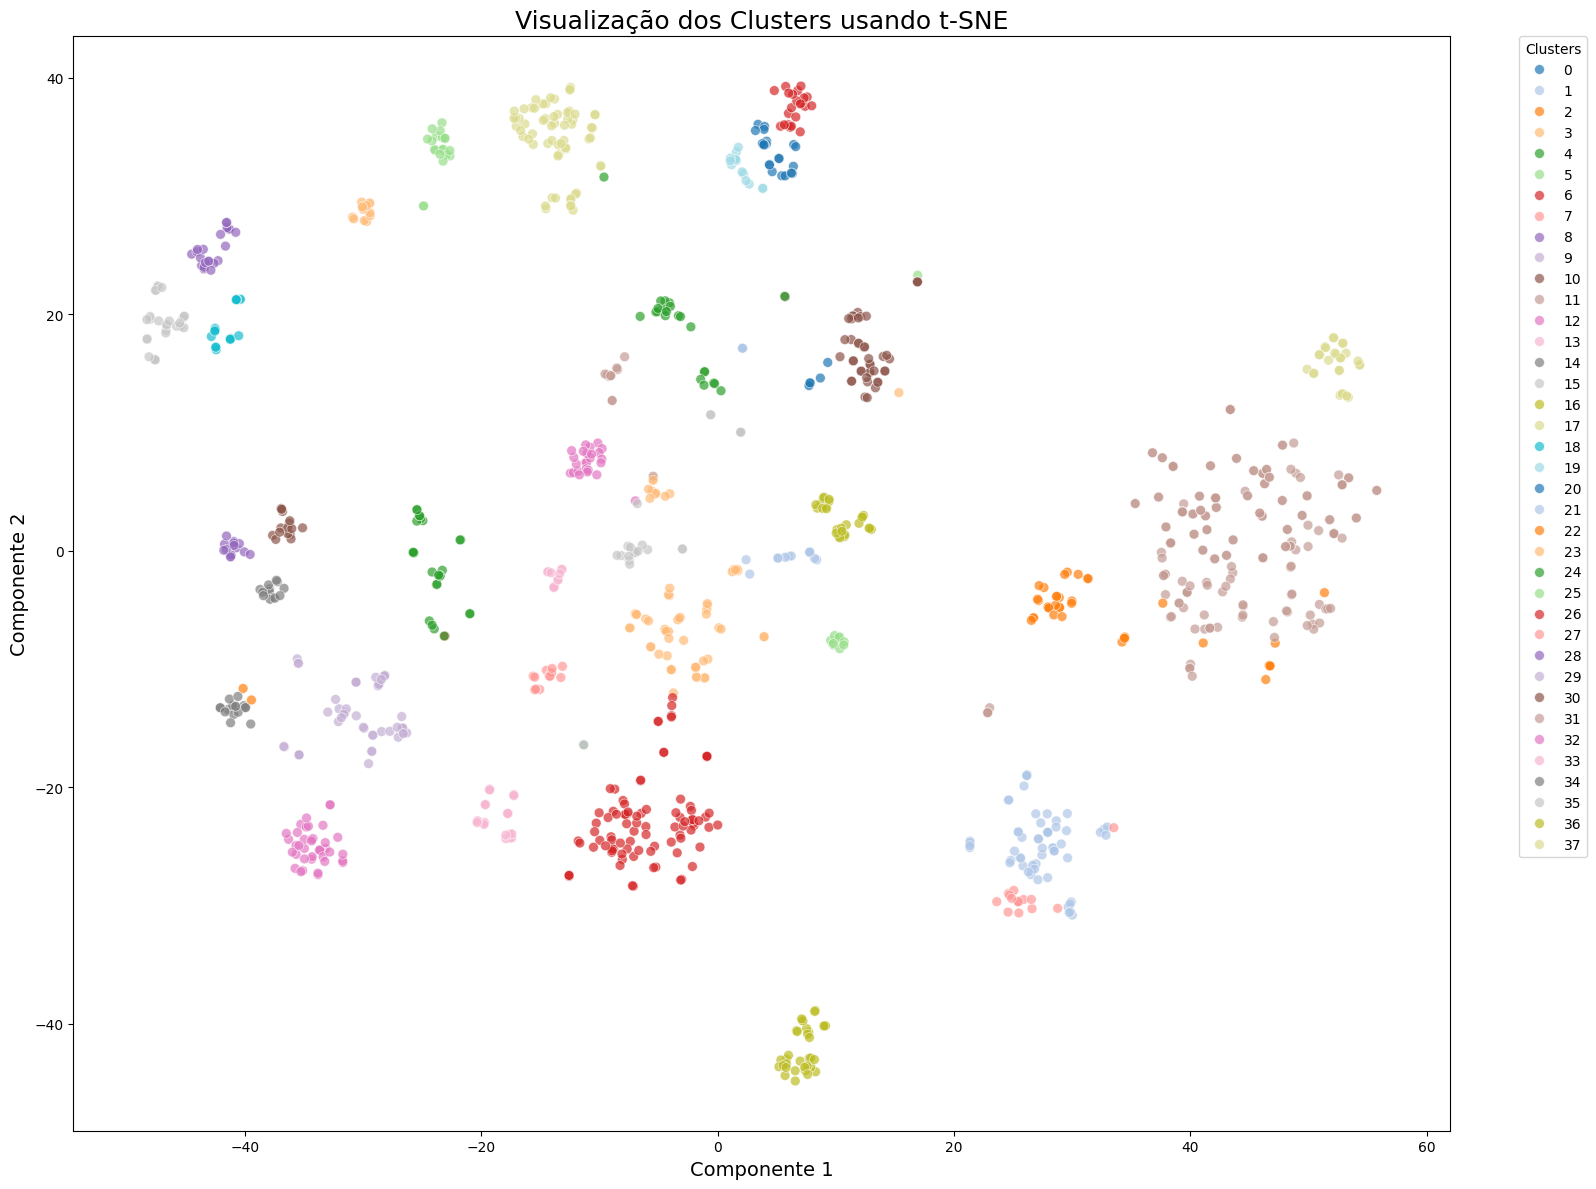

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

k_optimo = 38  # Escolhido através do teste de silhouette_score
# Realizando a clusterização com o número ótimo de clusters
kmeans = KMeans(n_clusters=k_optimo, random_state=42).fit(train_set)

# Aplicando t-SNE para reduzir a dimensionalidade para 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', max_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(train_set)

# Criando um DataFrame para facilitar a manipulação dos dados
df_tsne = pd.DataFrame()
df_tsne['Componente 1'] = X_embedded[:, 0]
df_tsne['Componente 2'] = X_embedded[:, 1]
df_tsne['Cluster'] = kmeans.labels_

# Utilizando uma paleta de cores apropriada
palette = sns.color_palette("tab20", k_optimo)  # Ajustar conforme necessário

# Plotando os clusters com Seaborn
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x='Componente 1',
    y='Componente 2',
    hue='Cluster',
    palette=palette,
    data=df_tsne,
    legend='full',
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title('Visualização dos Clusters usando t-SNE', fontsize=18)
plt.xlabel('Componente 1', fontsize=14)
plt.ylabel('Componente 2', fontsize=14)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.tight_layout()
plt.savefig('clusters_tsne.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Instalar RDKit no Google Colab
!pip install rdkit-pypi
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.0 MB/s eta 0:00:00


In [ ]:
# Caminho do arquivo com os SMILES
smiles_file = "/content/drive/My Drive/smiles/BACES/ligands_aux.txt"

# Leitura do arquivo e criação de um DataFrame para os SMILES
smiles_data = pd.read_csv(smiles_file, sep=" ", header=None, names=["smiles", "name"])

# Configura o índice do DataFrame para corresponder ao índice do DataFrame 'train_set'
smiles_data.set_index("name", inplace=True)

# Verifica se todos os nomes do DataFrame 'train_set' estão presentes em 'smiles_data'
missing_names = set(train_set.index) - set(smiles_data.index)
if missing_names:
    print(f"Atenção: Algumas moléculas não têm SMILES no arquivo: {missing_names}")

# Adiciona a coluna de SMILES ao DataFrame 'train_set'
train_set["smiles"] = smiles_data["smiles"]

# Exibe as primeiras linhas do DataFrame atualizado para confirmar
train_set


,0,1,2,3,4,5,6,7,8,9,...,2206,2207,2208,2209,2210,2211,2212,2213,2214,smiles
name,,,,,,,,,,,,,,,,,,,,,
YEPH,1,0,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,Cc1cc(sc1CCC(=O)N[C@@H](CC(O)=O)C(O)=O)C(=O)Oc...
VRIT,1,0,0,1,1,0,0,1,1,0,...,1,1,0,1,1,1,1,1,0,NC(=N)c1ccc(OC(=O)c2ccc(CC3(CCC3)C(=O)N[C@@H](...
BHGZ,1,0,0,1,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,0,CC(C)(Cc1ccc(s1)C(=O)Oc1ccc(cc1F)C(N)=N)C(=O)N...
JDSR,1,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,1,1,1,0,NC(=N)c1ccc(OC(=O)c2ccc(CN3CSC[C@H]3C(=O)N[C@@...
GMKQ,1,1,0,1,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,0,CCn1c2ccc(cc2s\c1=N/CC(C)(C)C(O)=O)C(=O)Oc1ccc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZLHN,1,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,1,1,0,NC(=N)c1ccc(OC(=O)c2cnc(s2)N2CCC(CC2)C(O)=O)cc1
DJUP,1,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,0,CC(Cc1ccc(o1)C(=O)Oc1ccc(cc1)C(N)=N)C(=O)N1CCCC1
LFPG,1,0,0,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,0,CCC(CC)(Cc1ccc(s1)C(=O)Oc1ccc(cc1F)C(N)=N)C(=O...


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Garantindo que o DataFrame numérico tenha as mesmas colunas que foram usadas para treinar o KMeans
train_set_numerico = train_set.select_dtypes(include=[np.number])
train_set_numerico = train_set_numerico.iloc[:, :kmeans.cluster_centers_.shape[1]]

# Calculando as distâncias de cada ponto (molécula) para seu centróide
closest, distances = pairwise_distances_argmin_min(train_set_numerico, kmeans.cluster_centers_)

# Adicionando as informações de cluster e distância ao DataFrame original para facilitar o trabalho
train_set['Cluster'] = kmeans.labels_
train_set['Distancia_Centroide'] = distances

# Inicializando uma lista para armazenar as moléculas mais próximas de cada centróide
top_moleculas = []

# Iterando sobre cada cluster para encontrar a molécula mais próxima do centroide
for cluster_id in range(k_optimo):
    # Filtrando as moléculas que pertencem ao cluster atual
    cluster_data = train_set[train_set['Cluster'] == cluster_id]

    # Ordenando os dados pela distância ao centroide
    cluster_data_sorted = cluster_data.sort_values('Distancia_Centroide')

    # Selecionando a molécula mais próxima do centroide
    if not cluster_data_sorted.empty:
        top_moleculas.append({
            'Cluster': cluster_id,
            'Nome_Molecula': cluster_data_sorted.index[0],  # Nome da molécula (ou índice)
            'Distancia_Centroide': cluster_data_sorted.iloc[0]['Distancia_Centroide'],
            'smiles': cluster_data_sorted.iloc[0]['smiles']  # Assumindo que há uma coluna 'smiles'
        })

# Transformando os resultados em um DataFrame para exibição
df_top_moleculas = pd.DataFrame(top_moleculas)

# Exibindo o DataFrame diretamente no notebook
df_top_moleculas.reset_index(drop=True, inplace=True)
df_top_moleculas


,Cluster,Nome_Molecula,Distancia_Centroide,smiles
0,0,KRKO,3.872983,Cl.CC(C)(Cc1ccc(s1)C(=O)Oc1ccc(cc1F)C(N)=N)C(=...
1,1,WDCU,6.018490,CC(C)N(Cc1ccc(s1)C(=O)Oc1ccc(cc1F)C(N)=N)C(=O)...
2,2,IWJD,4.374929,Cl.CC(C)(Cc1ccc(s1)C(=O)Oc1ccc(cc1F)C(N)=N)C(=...
3,3,LEOT,4.550906,CN(CCC(O)=O)c1ncc(s1)C(=O)Oc1ccc(cc1)C(N)=N
4,4,YQQH,6.058740,CN(CCC(O)=O)c1nc2ccc(cc2s1)C(=O)Oc1ccc(cc1F)C(...
5,5,VYFZ,5.626473,C[C@H](Cc1ccc(o1)C(=O)Oc1ccc(cc1)C(N)=N)C(=O)N...
6,6,YDBG,3.560899,CCCN(CC(O)=O)C(=O)C(C)(C)Cc1ccc(s1)C(=O)Oc1ccc...
7,7,QGEV,6.503568,COC(=O)CCNC(=O)C1CCN(CC1)c1ncc(s1)C(=O)Oc1ccc(...
8,8,OHSH,8.000000,NC(=N)Nc1ccc(cc1)C(=O)Oc1ccc2[C@@H](CC(=O)N[C@...
9,9,SQMV,4.743416,OC(=O)C(F)(F)F.NC(=N)Nc1ccc(cc1)C(=O)Oc1cccc(c...
